In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler , PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import Lasso, Ridge, ElasticNet
#from sklearn.pipeline import Pipeline

In [34]:
dataDF=pd.read_csv('california_housing.csv')
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [35]:
dataDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [36]:
# 타겟 분리
targetSR=dataDF['median_house_value']
featureDF=dataDF.drop(columns='median_house_value')

In [37]:
featureDF.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


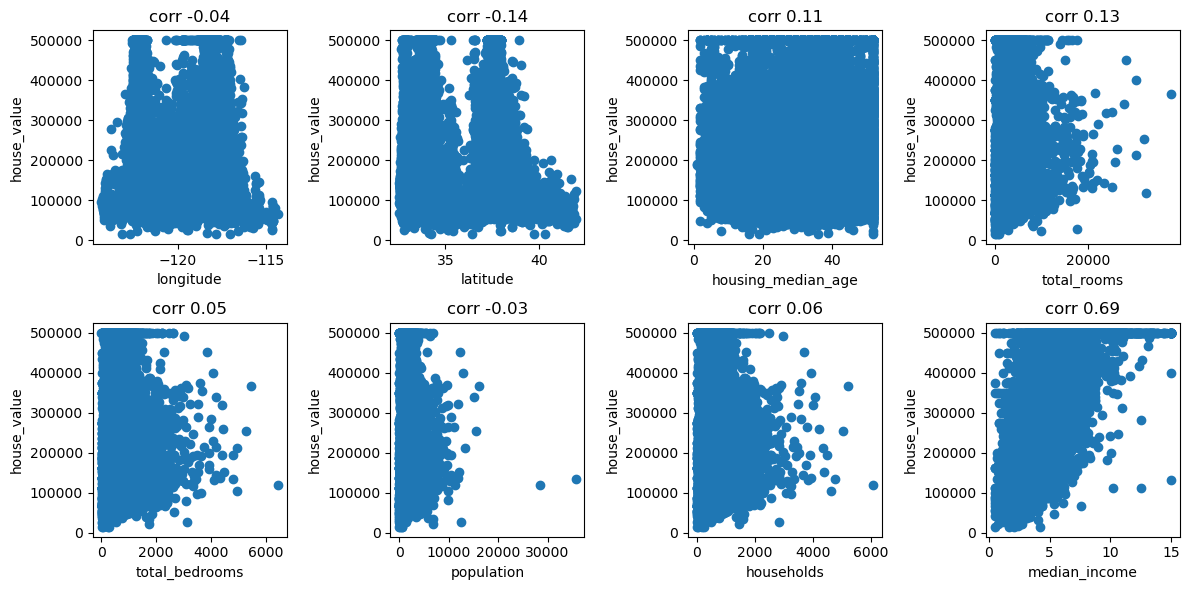

In [38]:
# 데이터 분포 확인
fig,ax=plt.subplots(figsize=(12,6),ncols=4,nrows=2)
for idx,col in enumerate( featureDF.columns):
    ax[idx//4,idx%4].scatter(featureDF[col],targetSR)
    ax[idx//4,idx%4].set(xlabel=col,ylabel='house_value',title=f'corr {np.corrcoef(featureDF[col],targetSR)[0,1]:.2f}')

plt.tight_layout()
plt.show()


In [39]:
# longitude, latitude 삭제
#featureDF.drop(columns=['longitude','latitude'],inplace=True)

In [40]:
# 학습셋 테스트셋 분리
X_train,X_test,y_train,y_test=train_test_split(featureDF,targetSR,random_state=15)

In [41]:
# 스케일링, poly 차수 변경 
# 함수 제작!
def get_poly_scaled(method,degree):
    scaler=method()
    scaled=scaler.fit_transform(X_train)
    poly=PolynomialFeatures(degree=degree)
    scaled = poly.fit_transform(scaled)
    return scaled
    


In [42]:
# 스케일링
scales=[(StandardScaler,1),(StandardScaler,2),(MinMaxScaler,1),(MinMaxScaler,2)]
for scale in scales:
    scaled=get_poly_scaled(scale[0],scale[1])
    cross=cross_validate(Ridge(),scaled,y_train,scoring='r2')
    print(f'method: {scale[0]} degree: {scale[1]} avg.score : {cross["test_score"].mean():.4f}')


method: <class 'sklearn.preprocessing._data.StandardScaler'> degree: 1 avg.score : 0.6382
method: <class 'sklearn.preprocessing._data.StandardScaler'> degree: 2 avg.score : 0.6698
method: <class 'sklearn.preprocessing._data.MinMaxScaler'> degree: 1 avg.score : 0.6355
method: <class 'sklearn.preprocessing._data.MinMaxScaler'> degree: 2 avg.score : 0.6669


In [43]:
# 평균점수가 제일 높은 minmax, 3degree로 진행
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
poly=PolynomialFeatures(degree=2)
X_2_train_scaled=poly.fit_transform(X_train)
X_2_test_scaled=poly.fit_transform(X_test)

In [44]:
param={'alpha':[0.1, 0.5, 1, 10,20,25]}

In [45]:
searchCV=GridSearchCV(Ridge(),param,cv=3,return_train_score=True)

In [46]:
searchCV.fit(X_2_train_scaled,y_train)

c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.4409e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.19255e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.47151e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\KDP-30\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.72045e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\KDP-30\anaconda3\env

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1, 10, 20, 25]},
             return_train_score=True)

In [47]:
pd.DataFrame(searchCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007076,0.000838,0.001374,4.327639e-04,0.1,{'alpha': 0.1},0.672590,0.707858,-0.104533,0.425305,0.374929,1,0.711986,0.701015,0.709788,0.707596,0.004739
1,0.005594,0.000538,0.000676,4.782263e-04,0.5,{'alpha': 0.5},0.669813,0.706140,-0.124659,0.417098,0.383367,2,0.710704,0.699361,0.708228,0.706098,0.004869
2,0.005750,0.000534,0.001001,1.255621e-05,1,{'alpha': 1},0.667668,0.704373,-0.133670,0.412790,0.386696,3,0.709331,0.697801,0.706603,0.704578,0.004920
3,0.006110,0.000184,0.000997,1.123916e-07,10,{'alpha': 10},0.660397,0.697882,-0.148485,0.403264,0.390446,4,0.703509,0.691999,0.700416,0.698641,0.004863
4,0.005761,0.000871,0.001065,7.125654e-05,20,{'alpha': 20},0.659020,0.696903,-0.151603,0.401440,0.391366,5,0.702494,0.691018,0.699367,0.697626,0.004844
5,0.004987,0.000818,0.000996,2.973602e-07,25,{'alpha': 25},0.658632,0.696669,-0.152832,0.400823,0.391801,6,0.702244,0.690759,0.699095,0.697366,0.004845


In [48]:
# 테스트셋 점수확인
searchCV.best_estimator_.score(X_2_test_scaled,y_test)

0.7113091429619935